# Зачем нужно масштабировать данные. Пример.

In [1]:
import pandas as pd

X = pd.read_csv('scaler_example.csv')
X.head()

,Unnamed: 0,lat,lon,class
0,0,55.718427,37.572628,1
1,1,55.718749,37.573061,1
2,2,55.719072,37.573495,1
3,3,55.719394,37.573928,1
4,4,55.719717,37.574361,1


Посмотрим, как выглядят точки из датасета.

Populating the interactive namespace from numpy and matplotlib


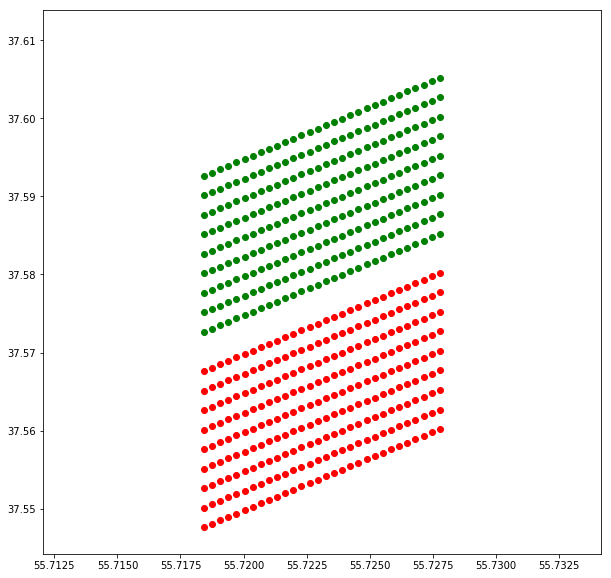

In [2]:
%pylab inline

Xtrain = X[['lat','lon']].values
Ytrain = X['class'].values

figure(figsize=(10,10))
scatter(Xtrain[Ytrain==1][:,0],Xtrain[Ytrain==1][:,1],color='green')
scatter(Xtrain[Ytrain==0][:,0],Xtrain[Ytrain==0][:,1],color='red')

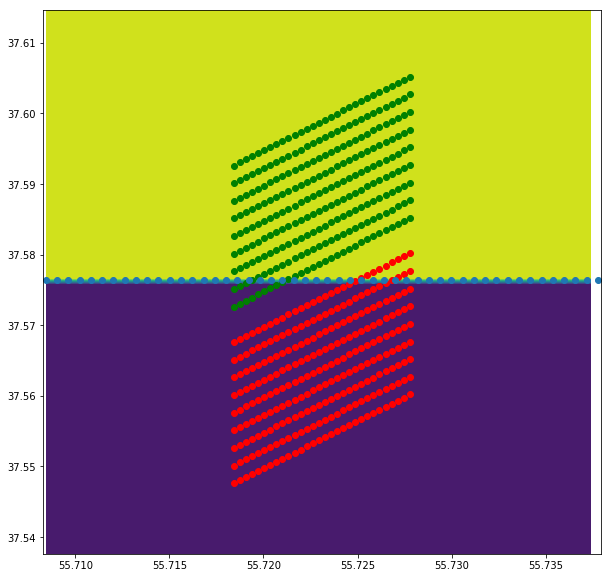

In [3]:
from sklearn.svm import SVC

clf = SVC(kernel='linear')
clf.fit(Xtrain,Ytrain)

def plot_decision_line(Xtrain, Ytrain, clf, h):

    x_min, x_max = Xtrain[:,0].min()-0.01, Xtrain[:,0].max()+0.01
    y_min, y_max = Xtrain[:,1].min()-0.01, Xtrain[:,1].max()+0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(10,10))
    plt.contourf(xx, yy, Z)

    Ytrain = np.array(Ytrain)
    plt.scatter(Xtrain[Ytrain==1][:,0],Xtrain[Ytrain==1][:,1],color='green')
    plt.scatter(Xtrain[Ytrain==0][:,0],Xtrain[Ytrain==0][:,1],color='red')

    a = clf.coef_[0][0]
    b = clf.coef_[0][1]
    c = clf.intercept_

    K = -a*1./b
    B = -c*1./b

    xx0 = np.linspace(x_min, x_max)
    yy0 = K * xx0 + B

    plt.scatter(xx0,yy0)
    plt.show()
    
plot_decision_line(Xtrain, Ytrain, clf, 0.001)

Видим, что линейный классификатор (SVM) абсолютно не справился с задачей. Попробуем масштабировать данные.

In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
TrainScaled = sc.fit_transform(Xtrain)

clf.fit(TrainScaled,Ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

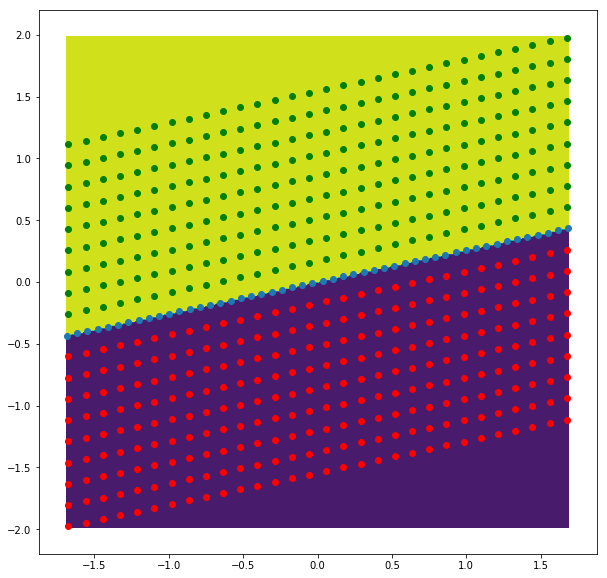

In [5]:
plot_decision_line(TrainScaled, Ytrain, clf, 0.01)